In [746]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [747]:
columns_name = ['Name','Platform','Year','Genre','Publisher','NA Sales','EU Sales',
                'JP Sales', 'Other Sales', 'Total Sales', 'Critic Score', 'Critic Count',
                'User Score', 'User Count', 'Developer', 'Rating;']
df_videogames = pd.read_csv('videogames_sales.csv', on_bad_lines='skip', na_values=['NaN', '', ';',0], 
                            names=columns_name, header=0)

In [748]:
df_videogames.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Total Sales,Critic Score,Critic Count,User Score,User Count,Developer,Rating;
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E;
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E;
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [749]:
df_videogames.tail()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Total Sales,Critic Score,Critic Count,User Score,User Count,Developer,Rating;
16605,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,NaN,NaN,0.01,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16606,LMA Manager 2007,X360,2006.0,Sports,Codemasters,NaN,0.01,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16607,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,NaN,NaN,0.01,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16608,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16609,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,NaN,NaN,0.01,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [750]:
df_videogames.isnull().sum()

Name                2
Platform          535
Year              791
Genre             537
Publisher         587
NA Sales         4935
EU Sales         6222
JP Sales        10613
Other Sales      6956
Total Sales       535
Critic Score     8926
Critic Count     8926
User Score       7153
User Count       9462
Developer        7076
Rating;          7214
dtype: int64

In [751]:
df_videogames.dropna(subset=['Name'], inplace=True)

In [752]:
df_videogames.isnull().sum()

Name                0
Platform          535
Year              791
Genre             535
Publisher         587
NA Sales         4934
EU Sales         6221
JP Sales        10612
Other Sales      6955
Total Sales       535
Critic Score     8924
Critic Count     8924
User Score       7151
User Count       9460
Developer        7074
Rating;          7212
dtype: int64

In [753]:
num_cols = ['Year','NA Sales','EU Sales','JP Sales','Other Sales','Total Sales',
            'Critic Score','Critic Count','User Score','User Count']

# Sayısal sütunları numeric tipine çevir, hatalı değerleri NaN yap
for col in num_cols:
    df_videogames[col] = pd.to_numeric(df_videogames[col], errors='coerce')

# Şimdi eksik sayısal değerleri medyan ile doldur
df_videogames[num_cols] = df_videogames[num_cols].fillna(df_videogames[num_cols].median())

In [754]:
df_videogames.isnull().sum()

Name               0
Platform         535
Year               0
Genre            535
Publisher        587
NA Sales           0
EU Sales           0
JP Sales           0
Other Sales        0
Total Sales        0
Critic Score       0
Critic Count       0
User Score         0
User Count         0
Developer       7074
Rating;         7212
dtype: int64

In [755]:
cat_cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating;']
df_videogames[cat_cols] = df_videogames[cat_cols].fillna('Unknown')

In [756]:
df_videogames.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA Sales        0
EU Sales        0
JP Sales        0
Other Sales     0
Total Sales     0
Critic Score    0
Critic Count    0
User Score      0
User Count      0
Developer       0
Rating;         0
dtype: int64

In [757]:
df_videogames

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Total Sales,Critic Score,Critic Count,User Score,User Count,Developer,Rating;
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E;
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.5,24.0,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E;
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.5,24.0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16605,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.14,0.07,0.01,0.02,0.01,71.0,21.0,7.5,24.0,Unknown,Unknown
16606,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.14,0.01,0.07,0.02,0.01,71.0,21.0,7.5,24.0,Unknown,Unknown
16607,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.14,0.07,0.01,0.02,0.01,71.0,21.0,7.5,24.0,Unknown,Unknown
16608,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.07,0.07,0.02,0.01,71.0,21.0,7.5,24.0,Unknown,Unknown


In [758]:
#En çok satan oyunlar
top_games = df_videogames[['Name','Total Sales']].sort_values(by='Total Sales', ascending=False).head(10)

In [759]:
top_games

,Name,Total Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,29.80
7,Wii Play,28.92
8,New Super Mario Bros. Wii,28.32
9,Duck Hunt,28.31


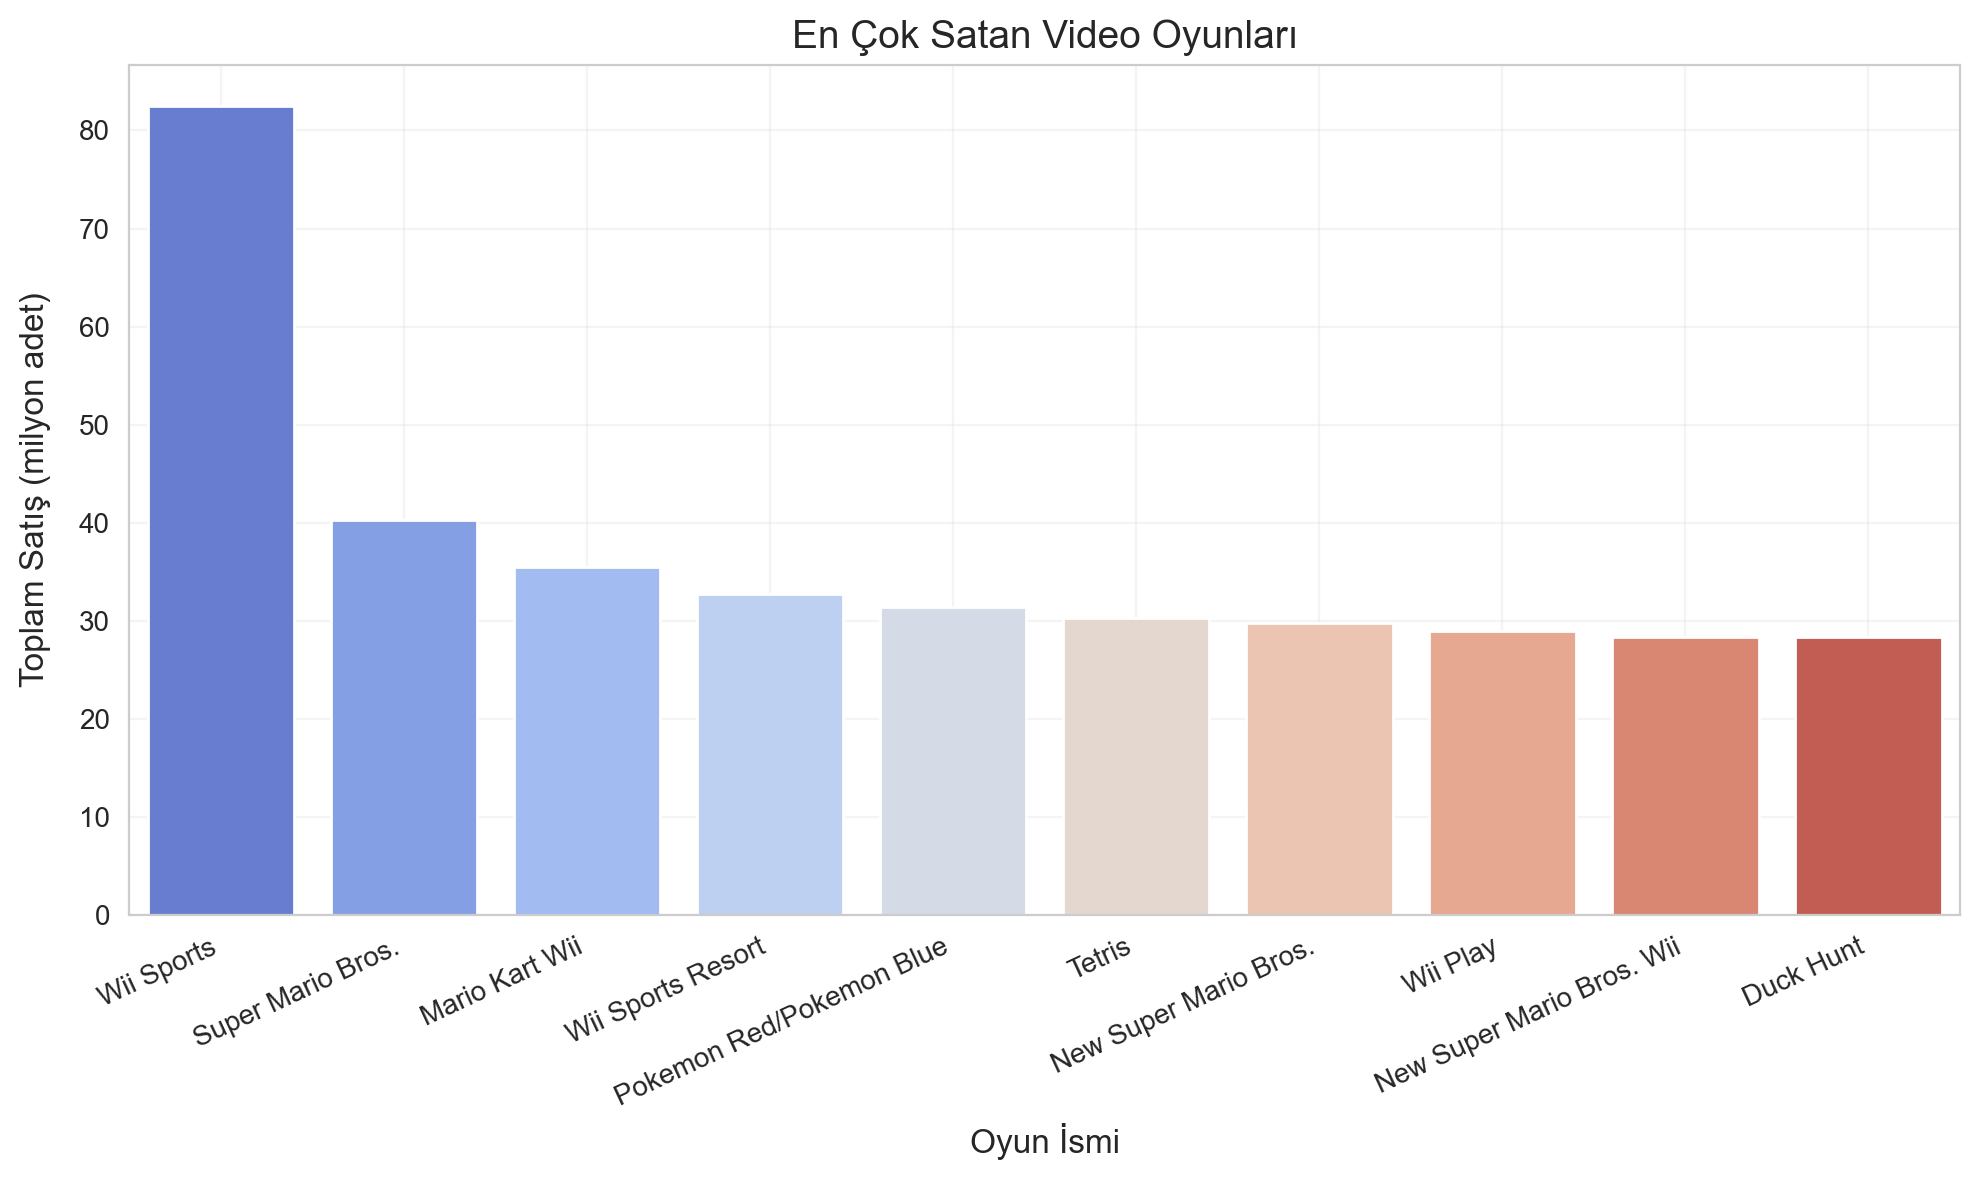

In [760]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=top_games,
            x='Name',
            y='Total Sales',
            hue='Name',  
            palette='coolwarm',
            legend=False)
plt.title('En Çok Satan Video Oyunları', fontsize=14)
plt.xlabel('Oyun İsmi', fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.ylabel('Toplam Satış (milyon adet)', fontsize=12, labelpad=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [761]:
#En çok satan yayıncılar
publisher_sales = df_videogames.groupby('Publisher', as_index=False)['Total Sales'].sum()
top_publisher = publisher_sales.sort_values(by='Total Sales', ascending=False).head(10)

In [762]:
top_publisher

,Publisher,Total Sales
354,Nintendo,1747.68
137,Electronic Arts,1085.48
21,Activision,658.19
450,Sony Computer Entertainment,574.25
520,Ubisoft,442.19
489,Take-Two Interactive,393.03
483,THQ,328.15
271,Konami Digital Entertainment,274.47
440,Sega,261.63
342,Namco Bandai Games,246.39


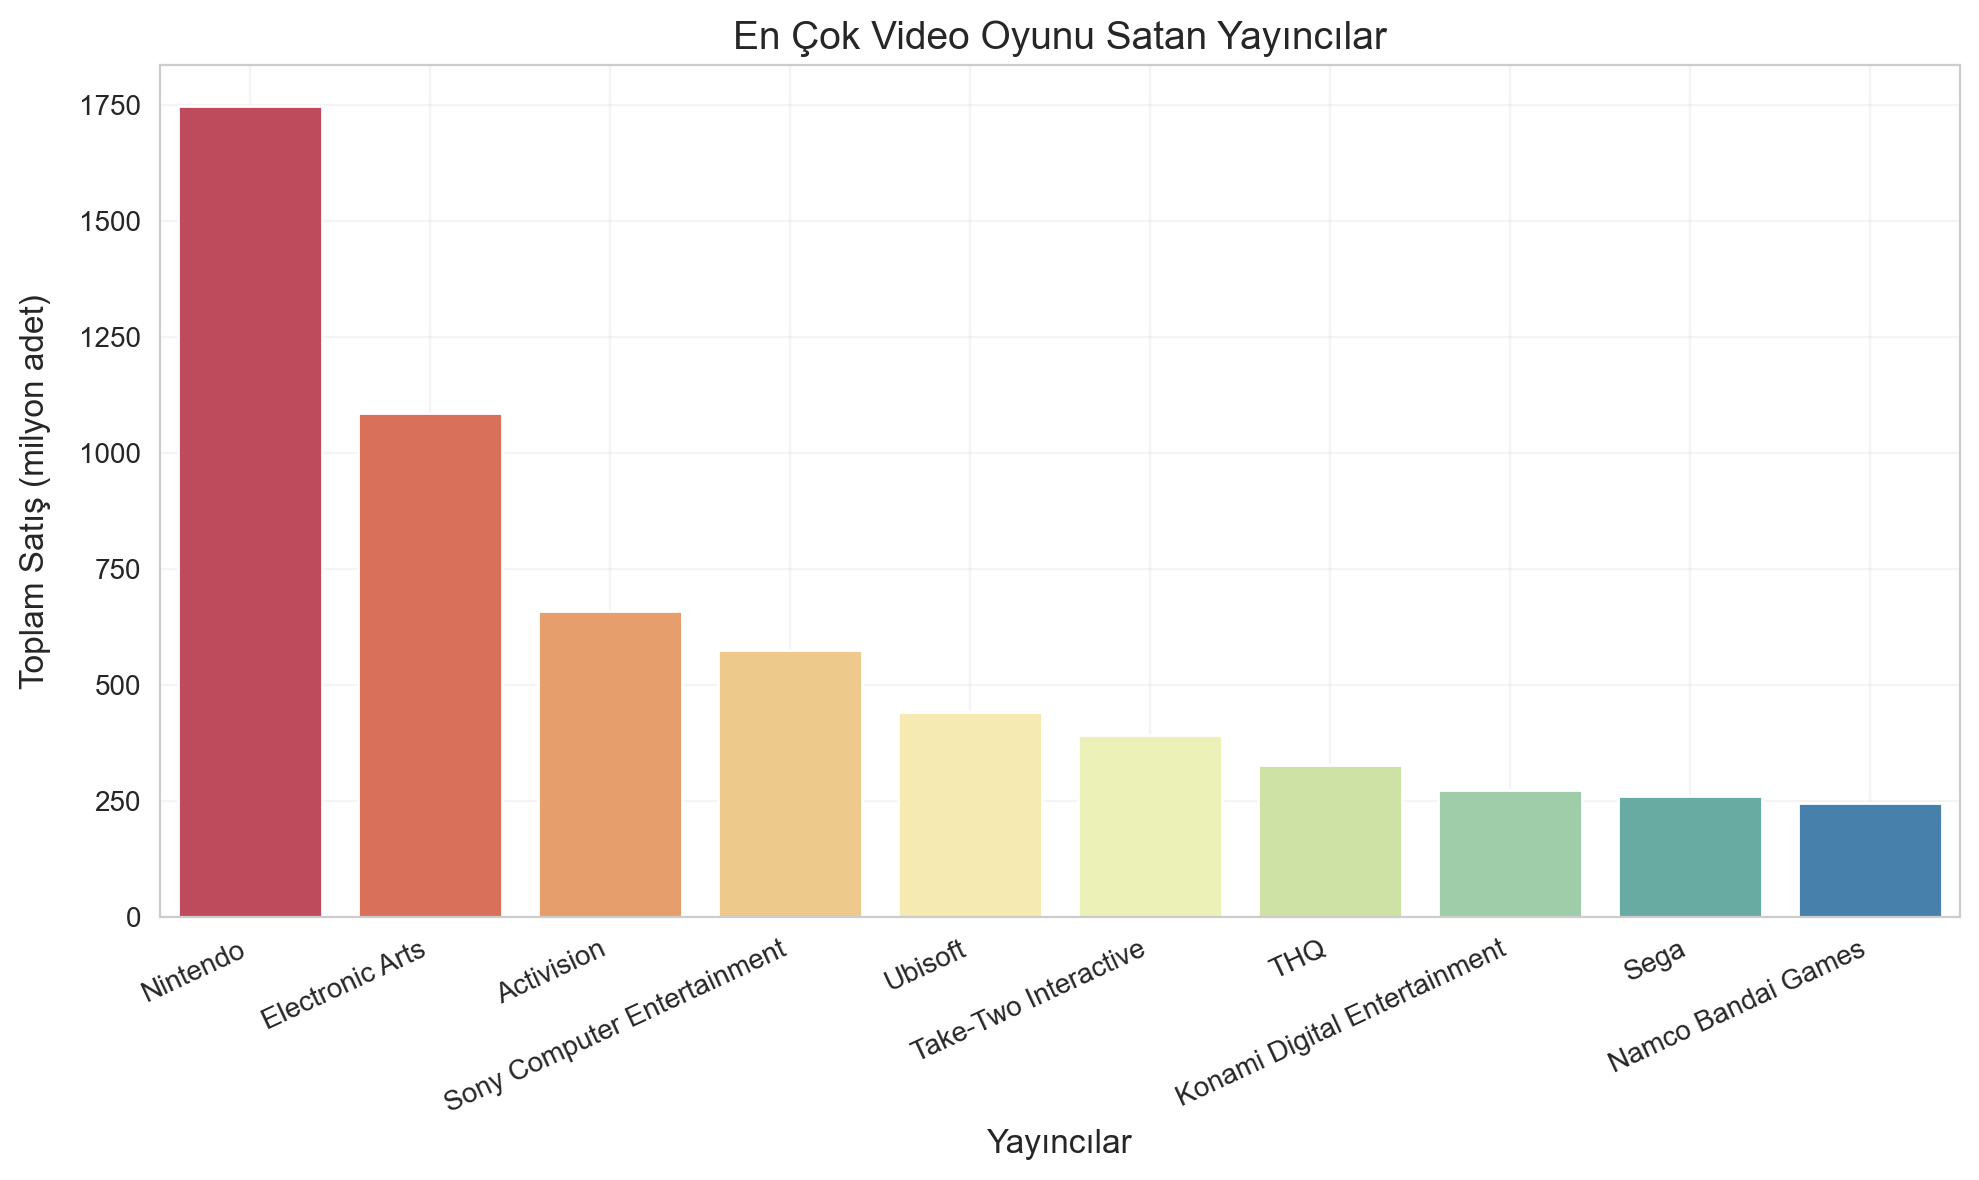

In [763]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=top_publisher,
            x='Publisher',
            y='Total Sales',
            hue='Publisher',
            palette='Spectral',
            legend=False)
plt.title('En Çok Video Oyunu Satan Yayıncılar',fontsize=14)
plt.xlabel('Yayıncılar', fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.ylabel('Toplam Satış (milyon adet)',fontsize=12, labelpad=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [764]:
#Yıllara göre satış trendi 
years_sales = df_videogames.groupby('Year',as_index=False)['Total Sales'].sum()
top_years = years_sales.sort_values(by='Total Sales', ascending=False).head(10)

In [765]:
top_years

,Year,Total Sales
27,2007.0,737.39
28,2008.0,637.42
29,2009.0,632.94
30,2010.0,552.19
26,2006.0,508.19
25,2005.0,445.24
31,2011.0,440.51
24,2004.0,414.23
22,2002.0,392.04
33,2013.0,358.42


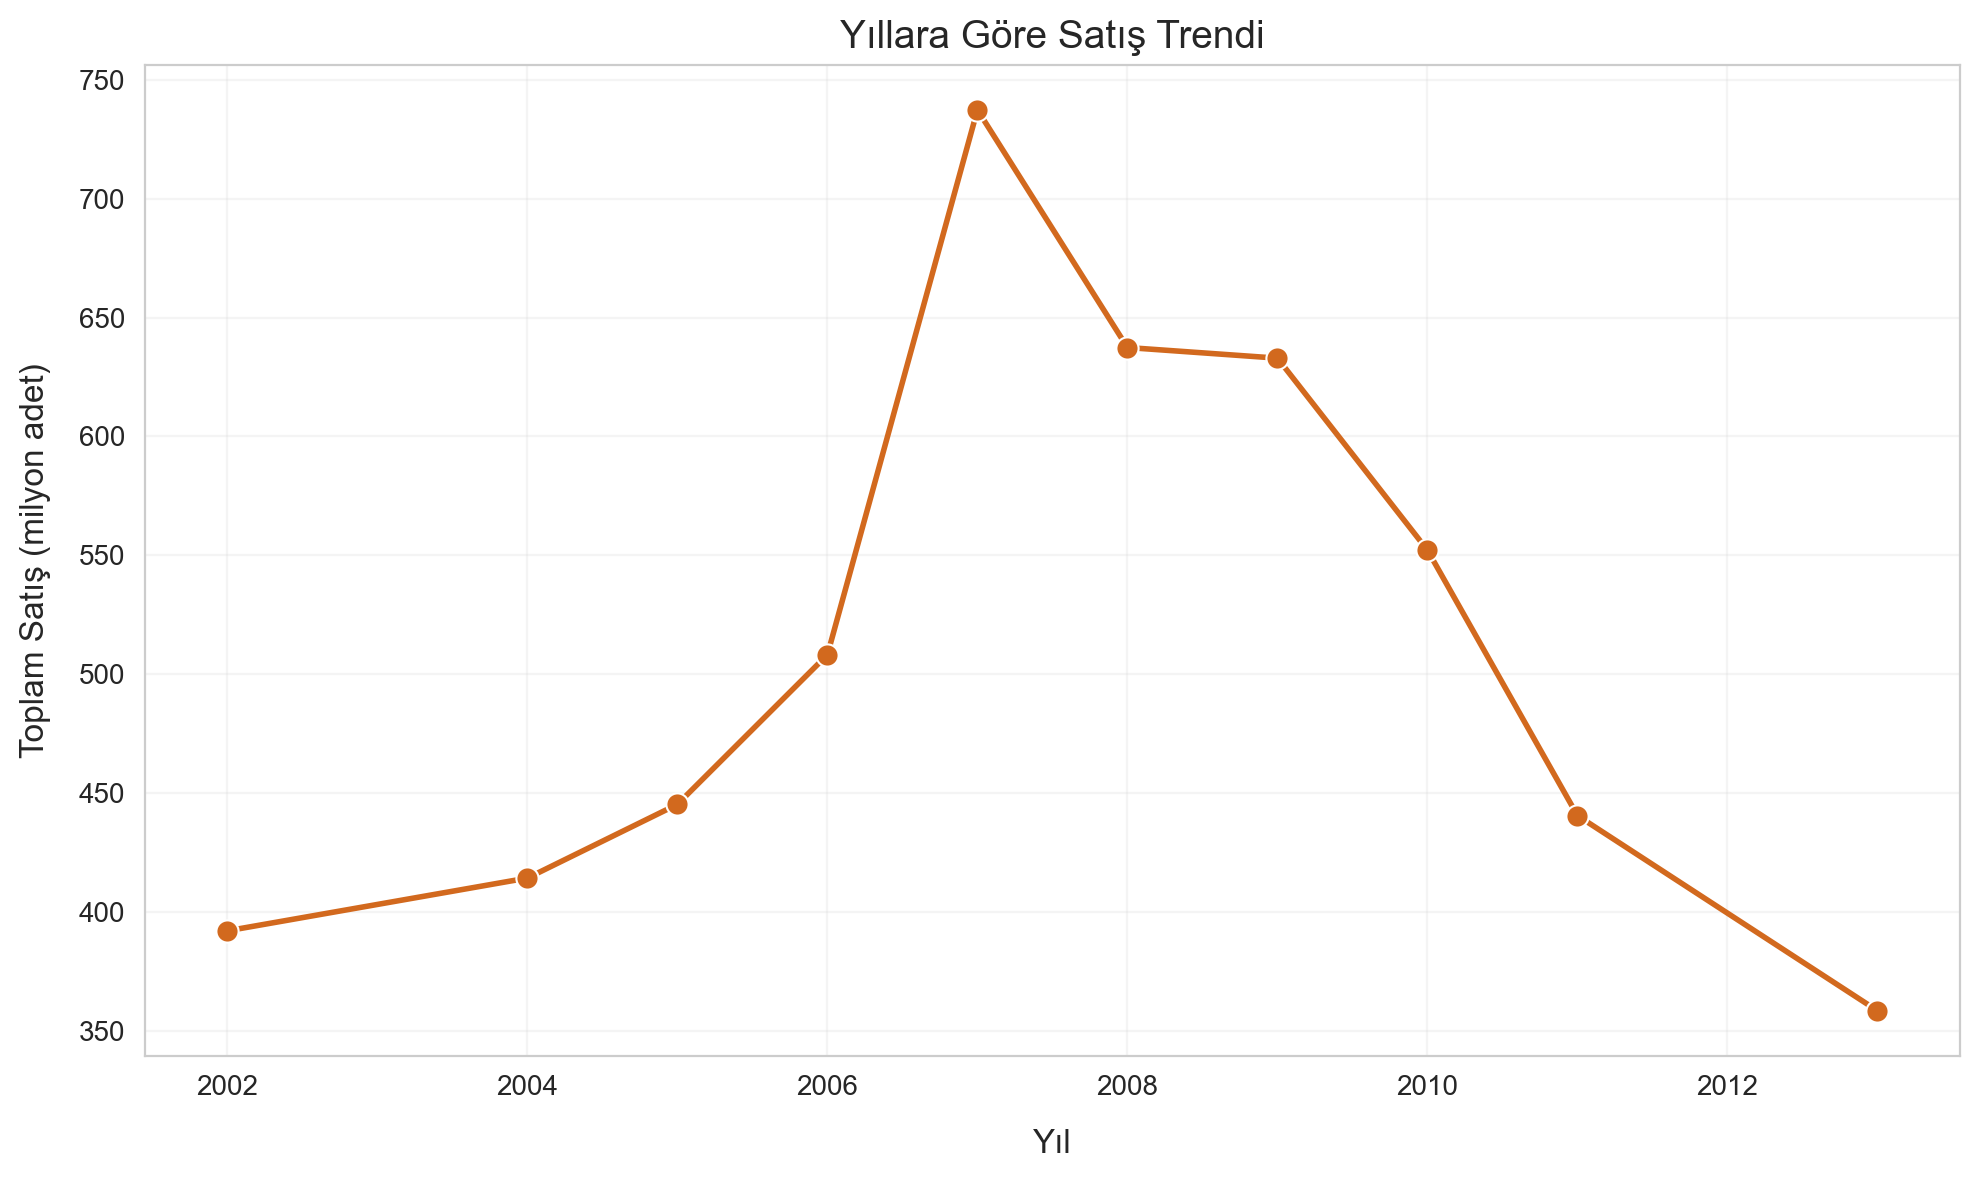

In [766]:
plt.figure(figsize=(10,6),dpi=200)
sns.lineplot(data=top_years,
             x='Year',
             y='Total Sales',
             color='#d2691e',
             linewidth=2,
             marker='o',
             markersize=8,
             legend=False)
plt.title('Yıllara Göre Satış Trendi',fontsize=14)
plt.xlabel('Yıl', fontsize=12,labelpad=10)
plt.ylabel('Toplam Satış (milyon adet)',fontsize=12, labelpad=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [767]:
#Platform ve Genre Bazlı Satış Analizi
platform_genre_sales = df_videogames.groupby(['Platform','Genre'], as_index=False)['Total Sales'].sum()
top_platform_genre = platform_genre_sales.sort_values('Total Sales', ascending=False).head(40)

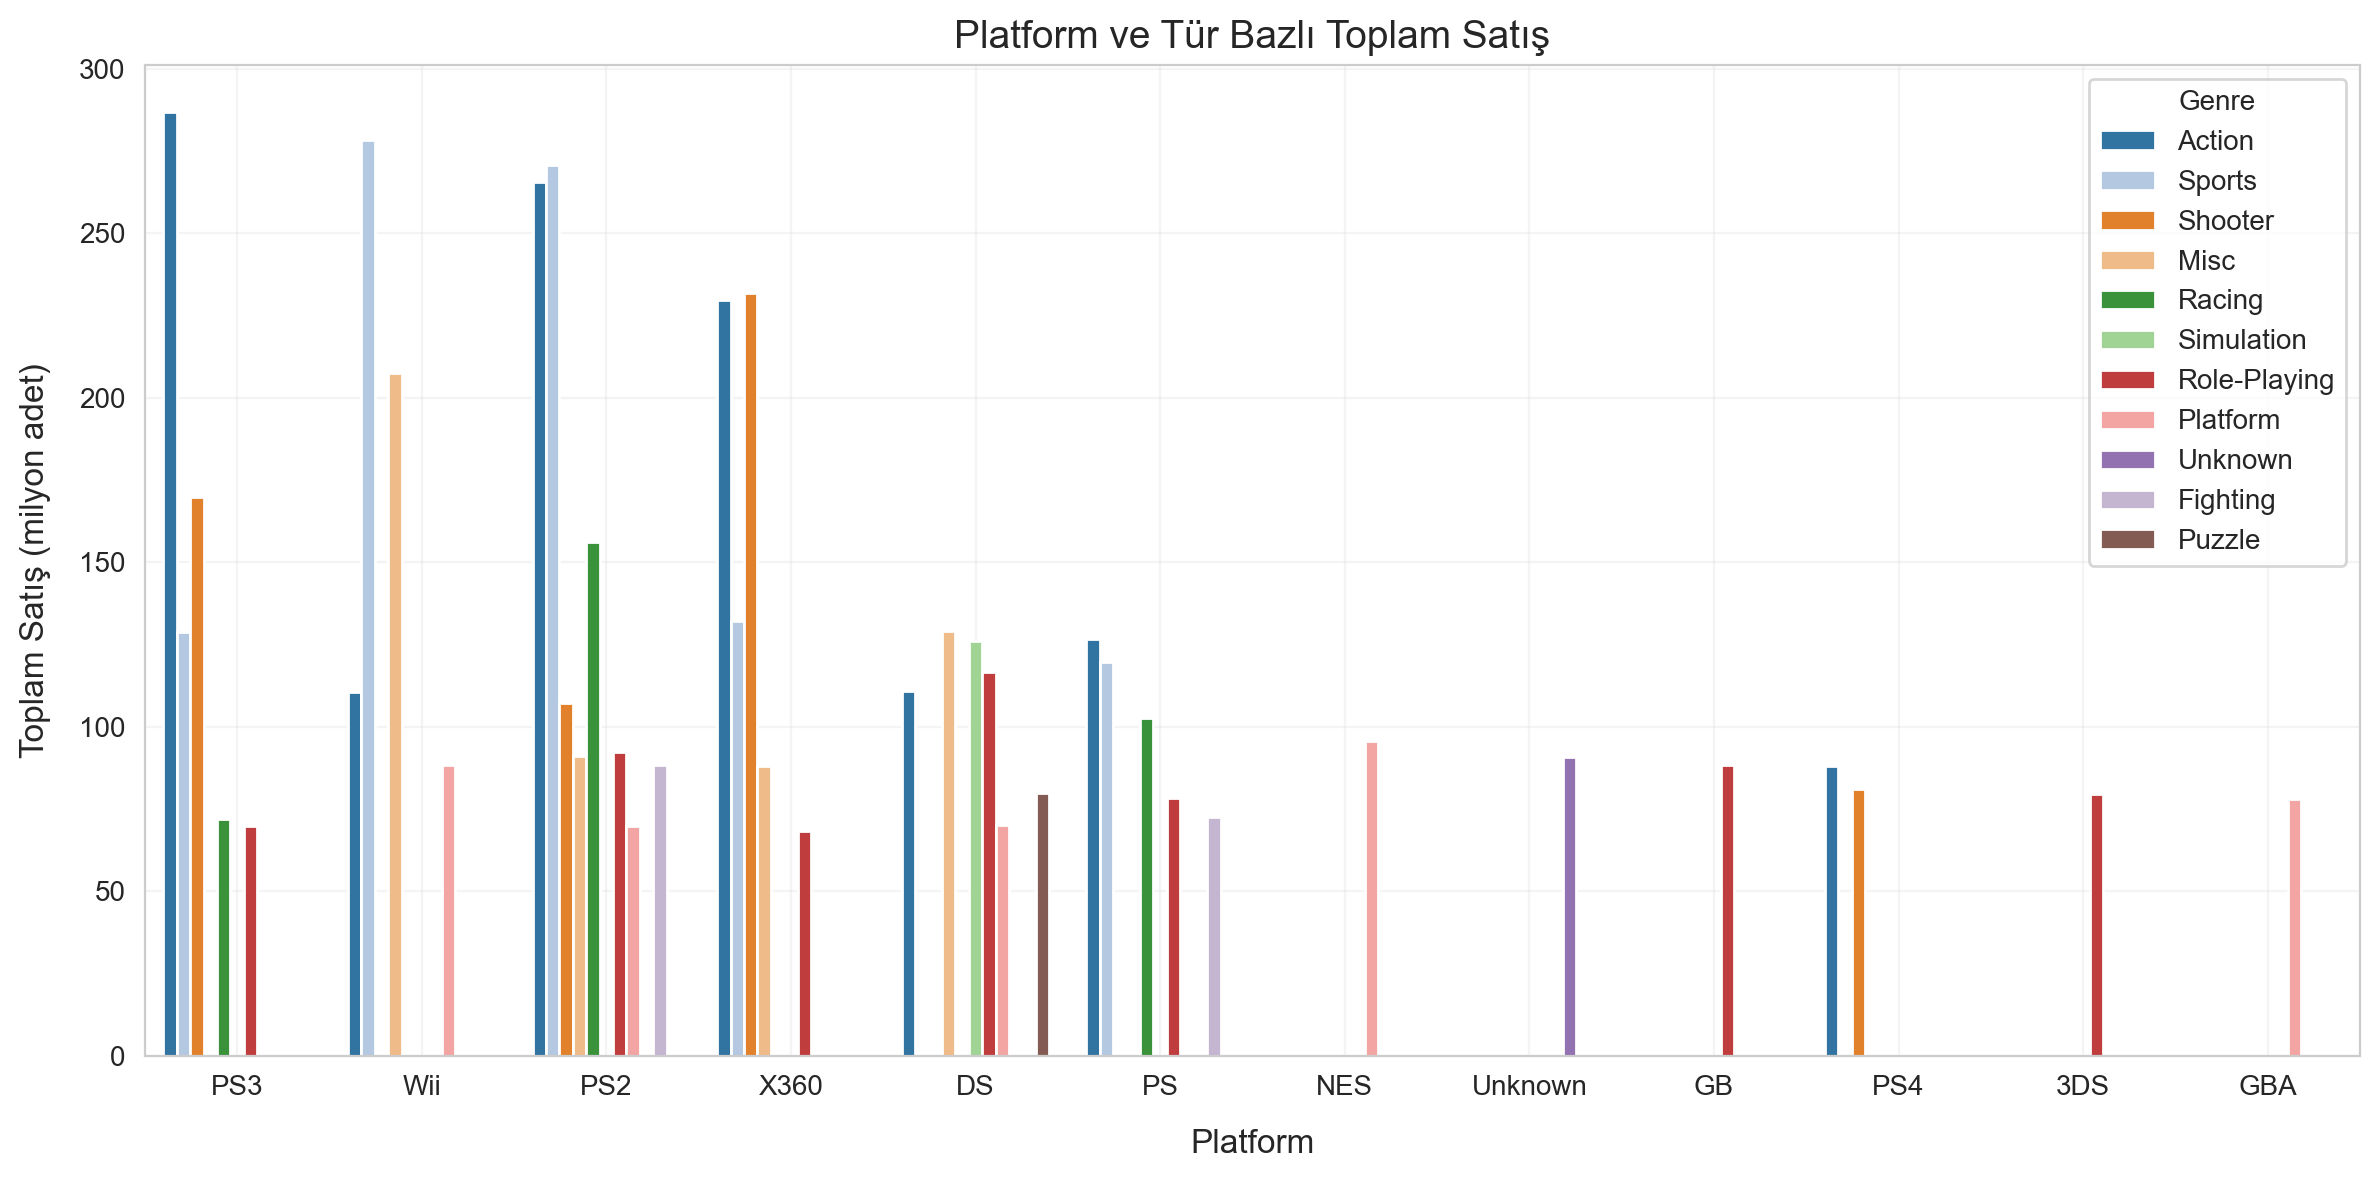

In [768]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(
    data=top_platform_genre,
    x='Platform',
    y='Total Sales',
    hue='Genre',
    palette='tab20'
)
plt.title('Platform ve Tür Bazlı Toplam Satış', fontsize=14)
plt.xlabel('Platform', fontsize=12, labelpad=10)
plt.ylabel('Toplam Satış (milyon adet)', fontsize=12, labelpad=10)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [769]:
#Puan (Critic/User) ve Satış İlişkisi
corr_cols = ['Critic Score', 'User Score', 'Total Sales']

# Korelasyon matrisi
corr_matrix = df_videogames[corr_cols].corr()
corr_matrix


,Critic Score,User Score,Total Sales
Critic Score,1.000000,0.479149,0.186915
User Score,0.479149,1.000000,0.053543
Total Sales,0.186915,0.053543,1.000000


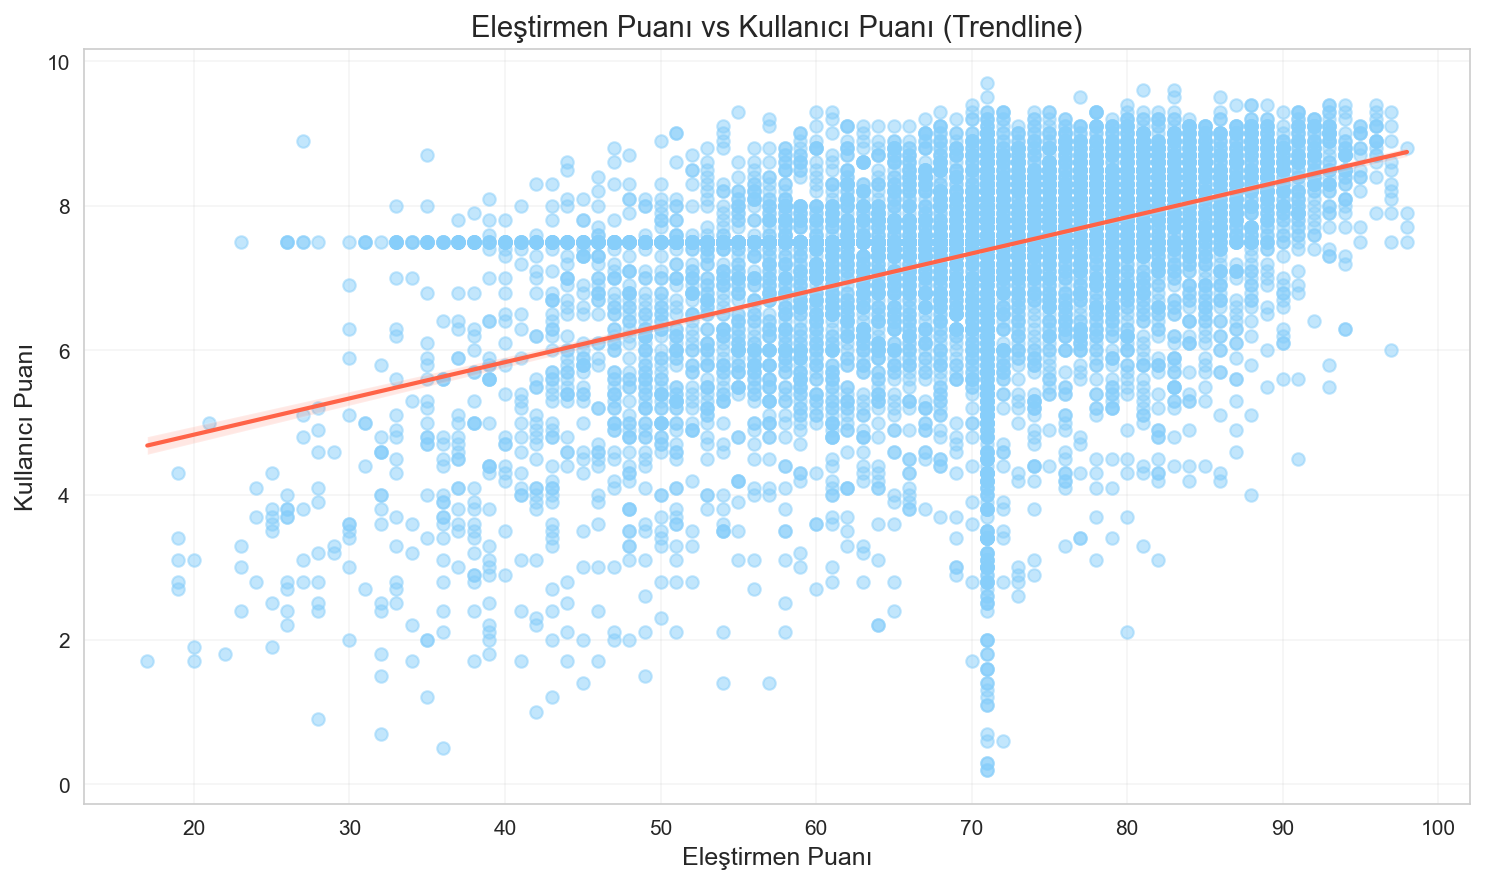

In [770]:
plt.figure(figsize=(10,6), dpi=150)
sns.regplot(
    data=df_videogames,
    x='Critic Score',
    y='User Score',
    color='#87cefa',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'#ff6347', 'linewidth':2}   # trend line
)
plt.title('Eleştirmen Puanı vs Kullanıcı Puanı (Trendline)', fontsize=14)
plt.xlabel('Eleştirmen Puanı', fontsize=12)
plt.ylabel('Kullanıcı Puanı', fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [771]:
#Bölgesel satış dağılımı
region_sales = df_videogames[['NA Sales','EU Sales', 'JP Sales', 'Other Sales']].sum()

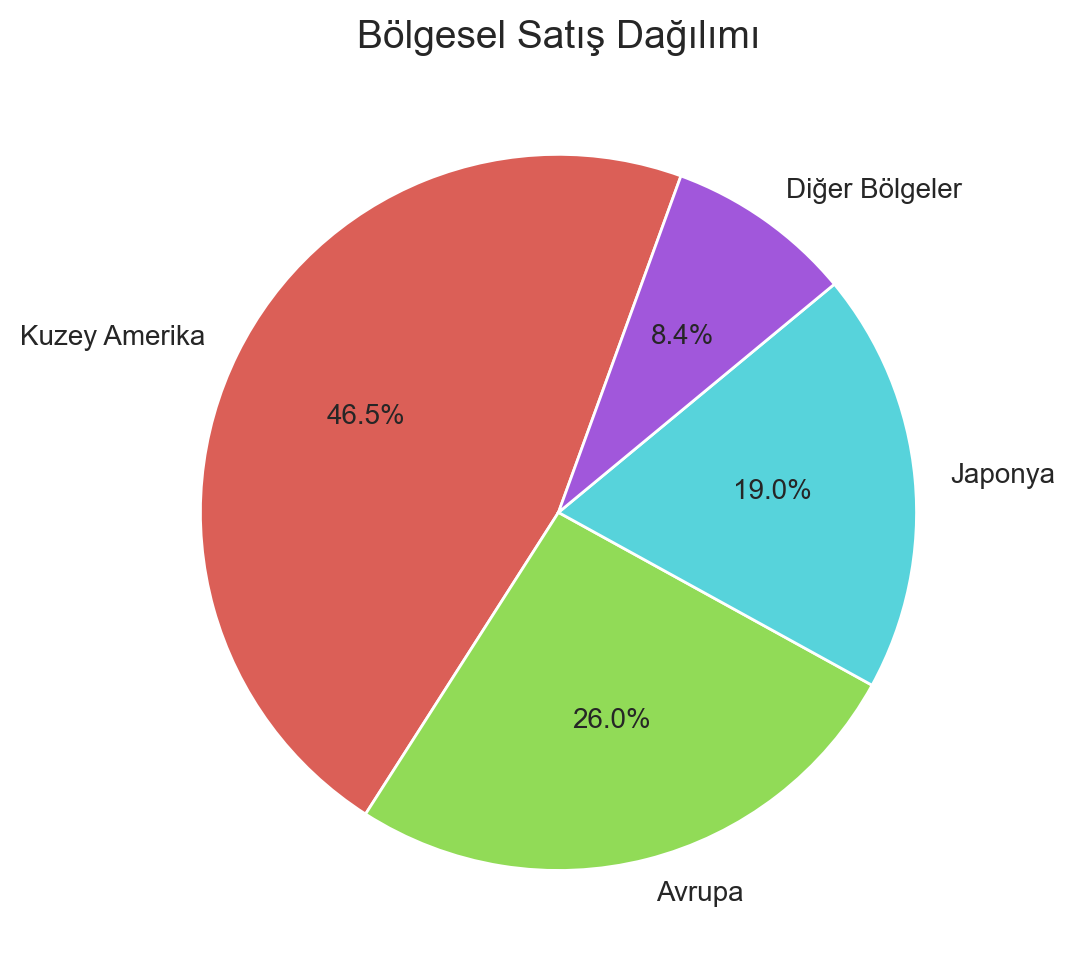

In [772]:
plt.figure(figsize=(9,5),dpi=200)
labels = ['Kuzey Amerika','Avrupa','Japonya','Diğer Bölgeler']
colors = sns.color_palette("hls", 4)
plt.pie(region_sales, labels=labels,colors=colors,autopct='%1.1f%%',startangle=70)
plt.title('Bölgesel Satış Dağılımı', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1280x960 with 0 Axes>

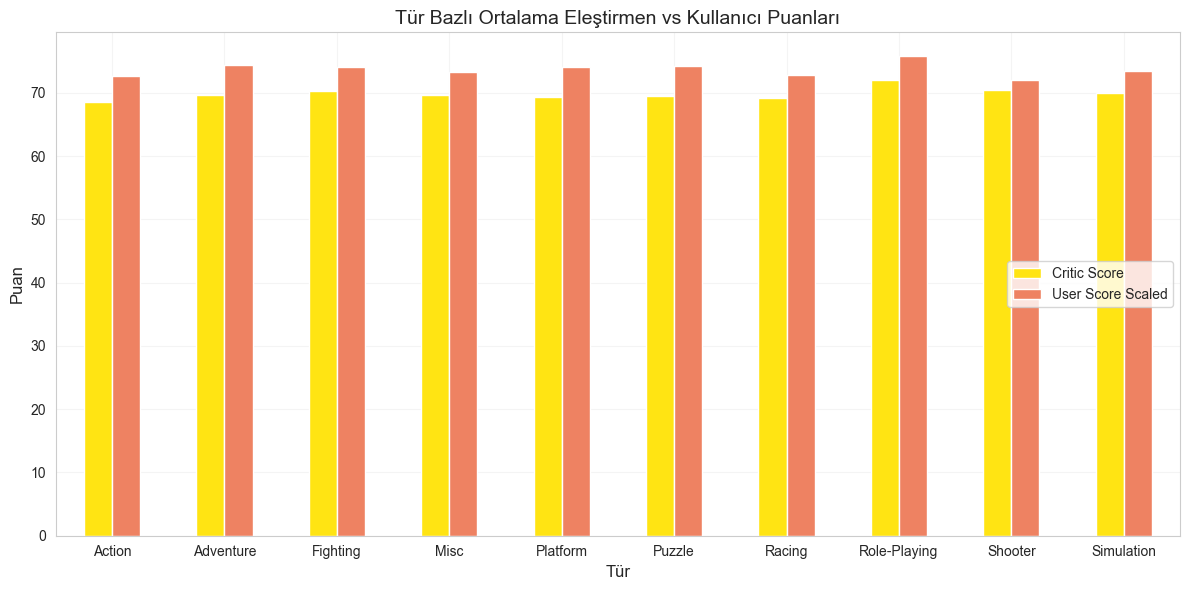

In [784]:
#Genre bazlı ortalama critic ve user score
df_videogames['User Score Scaled'] = df_videogames['User Score'] * 10
avg_scores = df_videogames.groupby('Genre')[['Critic Score','User Score Scaled']].mean().reset_index().head(10)
avg_scores.set_index('Genre', inplace=True)
plt.figure(dpi=200)
avg_scores.plot(kind='bar',
                figsize=(12,6),
                stacked=False,
                color=['#ffe413','#ee8262'])
plt.title('Tür Bazlı Ortalama Eleştirmen vs Kullanıcı Puanları',fontsize=14)
plt.xlabel('Tür',fontsize=12)
plt.ylabel('Puan',fontsize=12)
plt.xticks(rotation=0)
plt.grid(alpha=0.2)
plt.legend(loc=7)
plt.tight_layout()
plt.show()

